# Google Play Data Analysis

## Read Data

In [1]:
import pandas as pd
import numpy as np
datafile = "googleplaystore.csv"
df = pd.read_csv(datafile)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- only the Rating column is numerical

In [3]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [4]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Preprocessing

#### 1. convert number of reviews to int

In [5]:
# df['Reviews'].astype(int) #error in direct conversion

- since there is an error in direct conversion, there must be entries with non-integer values

In [6]:
import re
p = re.compile('[a-zA-Z]+')
t = df['Reviews'].apply(lambda x: p.search(str(x))!=None)
np.where(t)

(array([10472]),)

- there is one entry with a non-integer value at row 10372

In [7]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                                 19
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

- we see that there is no category for this app, and all cells have been shifted one column left
- we went to https://play.google.com/store/apps/details?id=com.lifemade.internetPhotoframe to find the actual category and updated the original data

In [8]:
df.loc[10472] = ['Life Made WI-Fi Touchscreen Photo Frame','LIFESTYLE', 1.9, '19', '3.0M', '1000+', 
                 'Free', '0', 'Everyone', 'Lifestyle', 'February 11, 2018', '1.0.19', '4.0 and up']

- now we can convert number of reviews to int successfully

In [9]:
df['Reviews'] = df['Reviews'].astype(int) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null int64
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10841 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10839 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


#### 2. convert size to int

- remove ',' and 'M', 'k' from app size and convert to common unit Megabyte (divide k by 1000)

In [10]:
df['Size'] = df['Size'].apply(lambda x: re.sub(',*M*','',str(x)))
df['Size'] = df['Size'].apply(lambda x: float(re.sub('k*','',str(x)))/1000 if 'k' in str(x) else x)

- remove apps with variable size and save in new df for future use

In [11]:
p = re.compile('[0-9.]+')
non_num_df = df['Size'].apply(lambda x: p.search(str(x))==None)
apps_with_var_size = df[non_num_df]
print(len(apps_with_var_size))
apps_with_var_size.head()

1695


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device


- disinclude apps with var size, and convert convert app size to float

In [12]:
df = df[non_num_df==False]
df['Size'] = df['Size'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
App               9146 non-null object
Category          9146 non-null object
Rating            7730 non-null float64
Reviews           9146 non-null int64
Size              9146 non-null float64
Installs          9146 non-null object
Type              9146 non-null object
Price             9146 non-null object
Content Rating    9146 non-null object
Genres            9146 non-null object
Last Updated      9146 non-null object
Current Ver       9138 non-null object
Android Ver       9144 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 1000.3+ KB


#### 3. convert num of installs to int

In [13]:
df['Installs'] = df['Installs'].apply(lambda x: re.sub(',*\+*','',str(x)))
df['Installs'] = df['Installs'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
App               9146 non-null object
Category          9146 non-null object
Rating            7730 non-null float64
Reviews           9146 non-null int64
Size              9146 non-null float64
Installs          9146 non-null int64
Type              9146 non-null object
Price             9146 non-null object
Content Rating    9146 non-null object
Genres            9146 non-null object
Last Updated      9146 non-null object
Current Ver       9138 non-null object
Android Ver       9144 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 1000.3+ KB


#### 4. convert price to float

In [14]:
df['Price'] = df['Price'].apply(lambda x: str(x).strip('$'))
df['Price'] = df['Price'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9146 entries, 0 to 10840
Data columns (total 13 columns):
App               9146 non-null object
Category          9146 non-null object
Rating            7730 non-null float64
Reviews           9146 non-null int64
Size              9146 non-null float64
Installs          9146 non-null int64
Type              9146 non-null object
Price             9146 non-null float64
Content Rating    9146 non-null object
Genres            9146 non-null object
Last Updated      9146 non-null object
Current Ver       9138 non-null object
Android Ver       9144 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1000.3+ KB


#### 5. split multiple genres

In [15]:
df['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education', 'Education;Creativity', 'Education;Education',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Brain Games', 'Entertainment;Music & Video',
       'Events', 'Finance', 'Food & Drink', 'Health & Fitness',
       'House & Home', 'Libraries & Demo', 'Lifestyle',
       'Lifestyle;Pretend Play', 'Adventure;Action & Adventure', 'Arcade',
       'Casual', 'Card', 'Casual;Pretend Play', 'Strategy', 'Action',
       'Puzzle', 'Sports', 'Word', 'Racing', 'Casual;Creativity',
       'Simulation', 'Adventure', 'Board', 'Trivia', 'Role Playing',
       'Simulation;Education', 'Action;Action & Adventure',
       'Casual;Brain Games', 'Simulat

- we find there are multiple genres for a single app, so we should segment the data for analysis

In [16]:
df['Genres'] = df['Genres'].apply(lambda x: str(x).split(';'))
t2 = df['Genres'].apply(lambda x: len(x)>2)
df[t2]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


- we find that a single app has at most two types of genres, so we add new columns Genre 1 and Genre2 in place of the original column Genres

In [17]:
df['Genre1'] = df['Genres'].apply(lambda x: x[0])
df['Genre2'] = df['Genres'].apply(lambda x: x[1] if len(x)>1 else None)

In [18]:
df.drop('Genres',axis=1,inplace=True)

In [19]:
df['Genre1'].unique()

array(['Art & Design', 'Auto & Vehicles', 'Beauty', 'Books & Reference',
       'Business', 'Comics', 'Communication', 'Dating', 'Education',
       'Entertainment', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Adventure', 'Arcade', 'Casual', 'Card', 'Strategy',
       'Action', 'Puzzle', 'Sports', 'Word', 'Racing', 'Simulation',
       'Board', 'Trivia', 'Role Playing', 'Educational', 'Music',
       'Music & Audio', 'Video Players & Editors', 'Medical', 'Social',
       'Shopping', 'Photography', 'Travel & Local', 'Tools',
       'Personalization', 'Productivity', 'Parenting', 'Weather',
       'News & Magazines', 'Maps & Navigation', 'Casino'], dtype=object)

In [20]:
df['Genre2'].unique()

array([None, 'Pretend Play', 'Creativity', 'Action & Adventure',
       'Education', 'Brain Games', 'Music & Video'], dtype=object)

- There are very few types of Genre2, which are subsets of Genre1, so we drop the Genre2 column

In [21]:
df.drop('Genre2',axis=1,inplace=True)

In [22]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,Genre1
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,"January 7, 2018",1.0.0,4.0.3 and up,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,"January 15, 2018",2.0.0,4.0.3 and up,Art & Design
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,"August 1, 2018",1.2.4,4.0.3 and up,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,"June 8, 2018",Varies with device,4.2 and up,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,"June 20, 2018",1.1,4.4 and up,Art & Design


#### 6. Convert last updated to datetime

In [23]:
import datetime
df['Last Updated'] = df['Last Updated'].apply(lambda x:datetime.datetime.strptime(x,'%B %d, %Y'))

## Exploring meaningfulless of data

- does it make sense to keep data where installs and reviews are 0?

In [24]:
sum(np.where(df['Installs']==0,1,0))

14

In [25]:
'%1.5f%%'%(sum(np.where(df['Installs']==0,1,0))*100/len(df))

'0.15307%'

In [26]:
sum(np.where(df['Reviews']==0,1,0))

557

In [27]:
'%1.5f%%'%(sum(np.where(df['Reviews']==0,1,0))*100/len(df))

'6.09009%'

- since the records where installs are 0 make up only 0.15307% of total data, we will remove them
- we will need to take a closer look at records with no reviews and the distribution of installs

In [28]:
df = df[df['Installs']!=0]

In [29]:
pd.concat([df[df['Reviews']==0]['Rating'],df[df['Reviews']==0]['Installs']],axis=1)

,Rating,Installs
478,NaN,50
479,NaN,100
621,NaN,50
623,NaN,50
627,NaN,500
628,NaN,100
630,NaN,10
632,NaN,10
635,NaN,10
639,NaN,10


- We can see that for apps with 0 reviews, their ratings are also 0, which does not contribute to our final analysis because of insignificant user base.
- Therefore, we also remove columns with no ratings/reviews

In [30]:
df = df.dropna(axis=0,how='any')

#### Preliminary data plot analysis

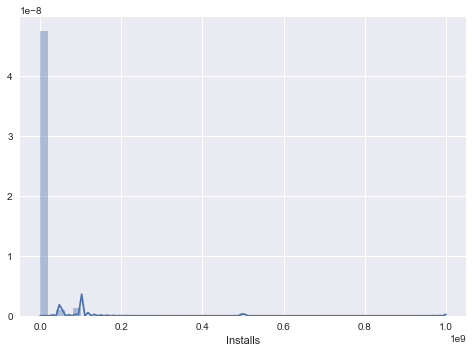

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
sns.distplot(df['Installs'])

- the data is too widely distributed on initial plotting distribution, so we take the log of df['Installs']

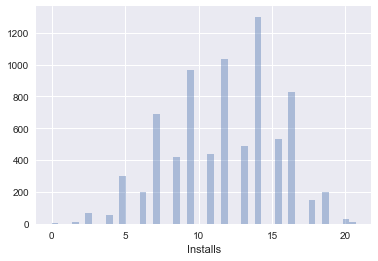

In [32]:
x = np.log(df['Installs'])
sns.distplot(x,kde = False)

## Basic data analysis

#### 1. Rough look at relations between each attributes

In [33]:
x = df['Rating']
y = df['Size']
z = df['Installs']
p = df['Reviews']
t = df['Type']
price = df['Price']
# pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)))

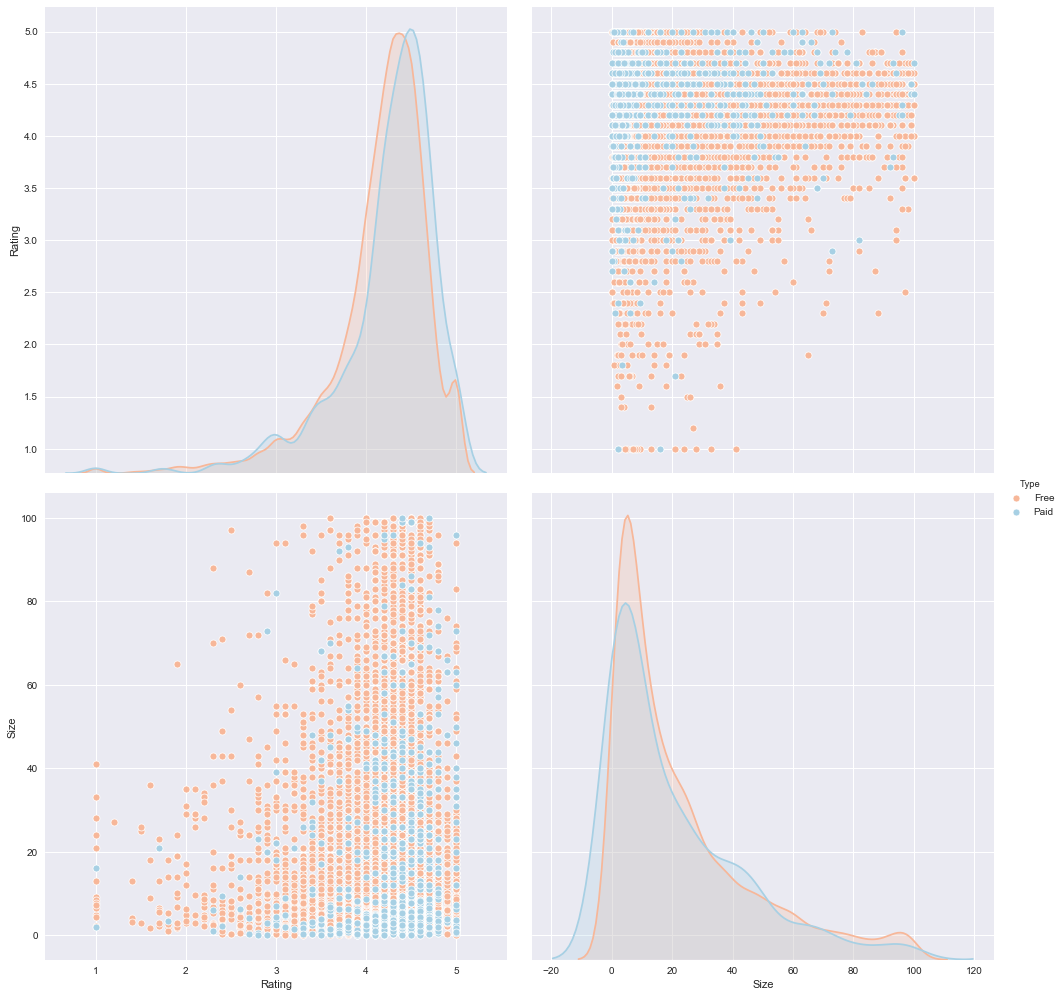

In [34]:
import seaborn as sns
x = df['Rating'].dropna()
y = df['Size']
t = df['Type']
p = sns.pairplot(pd.DataFrame(list(zip(x, y,t)), 
                        columns=['Rating','Size','Type']), 
                 hue='Type', palette="RdBu",height=7)

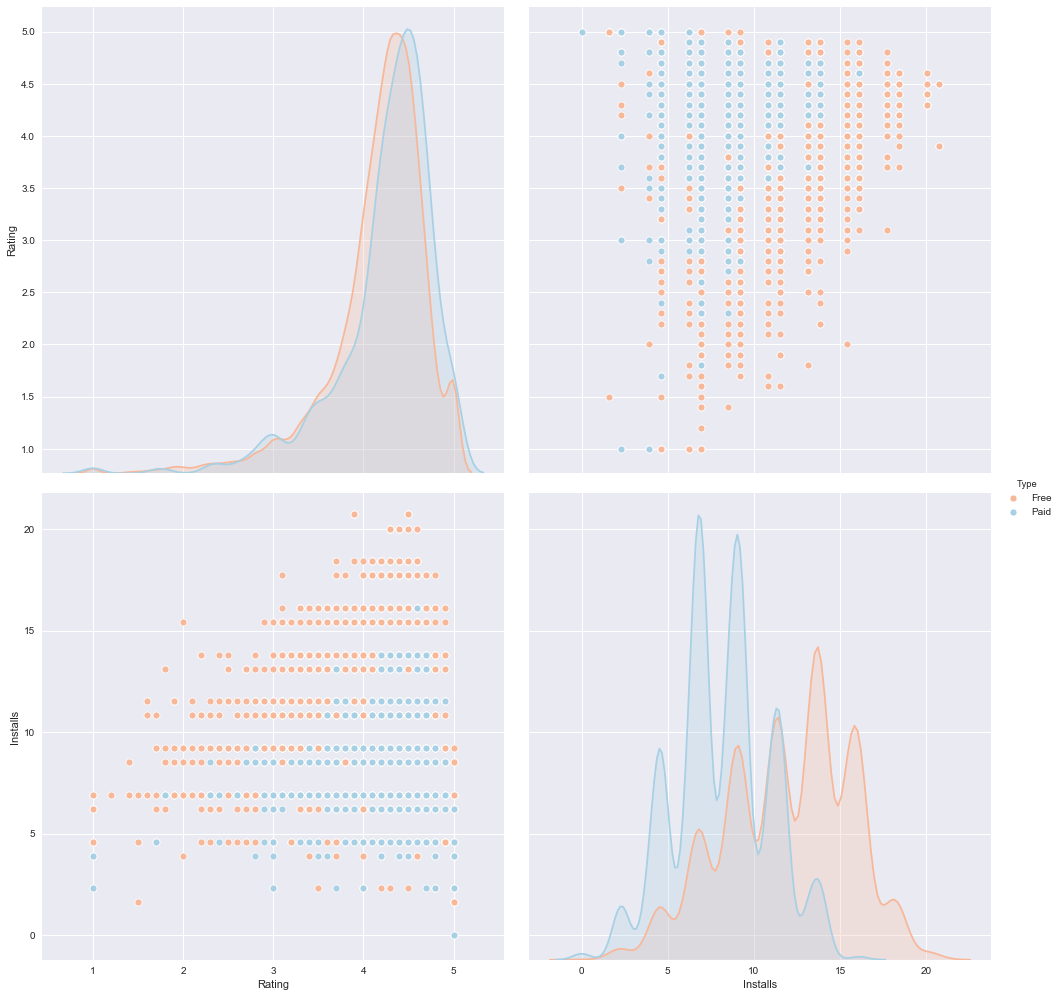

In [40]:
p = sns.pairplot(pd.DataFrame(list(zip(x, np.log(z),t)), 
                        columns=['Rating','Installs','Type']), 
                 hue='Type', palette="RdBu",height=7)

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


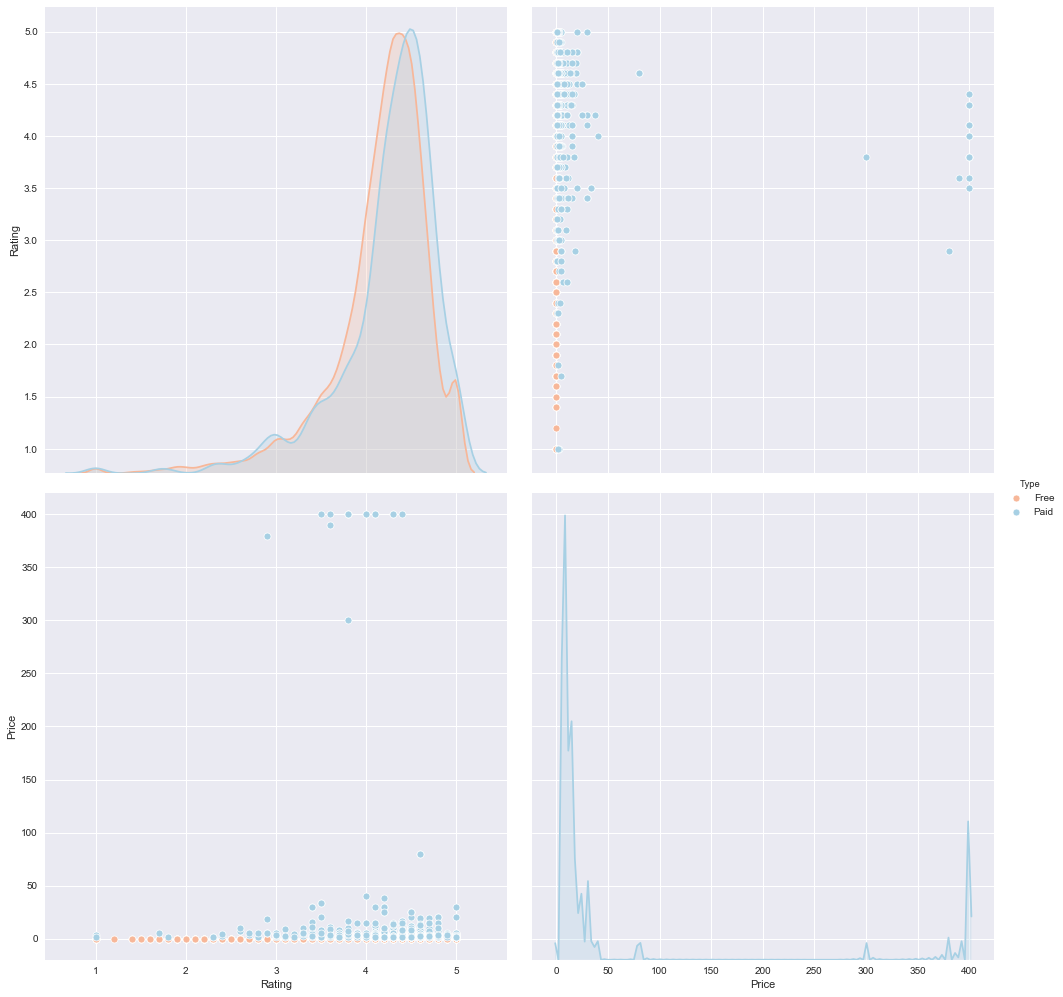

In [41]:
p = sns.pairplot(pd.DataFrame(list(zip(x, price,t)), 
                        columns=['Rating','Price','Type']), 
                 hue='Type', palette="RdBu",height=7)

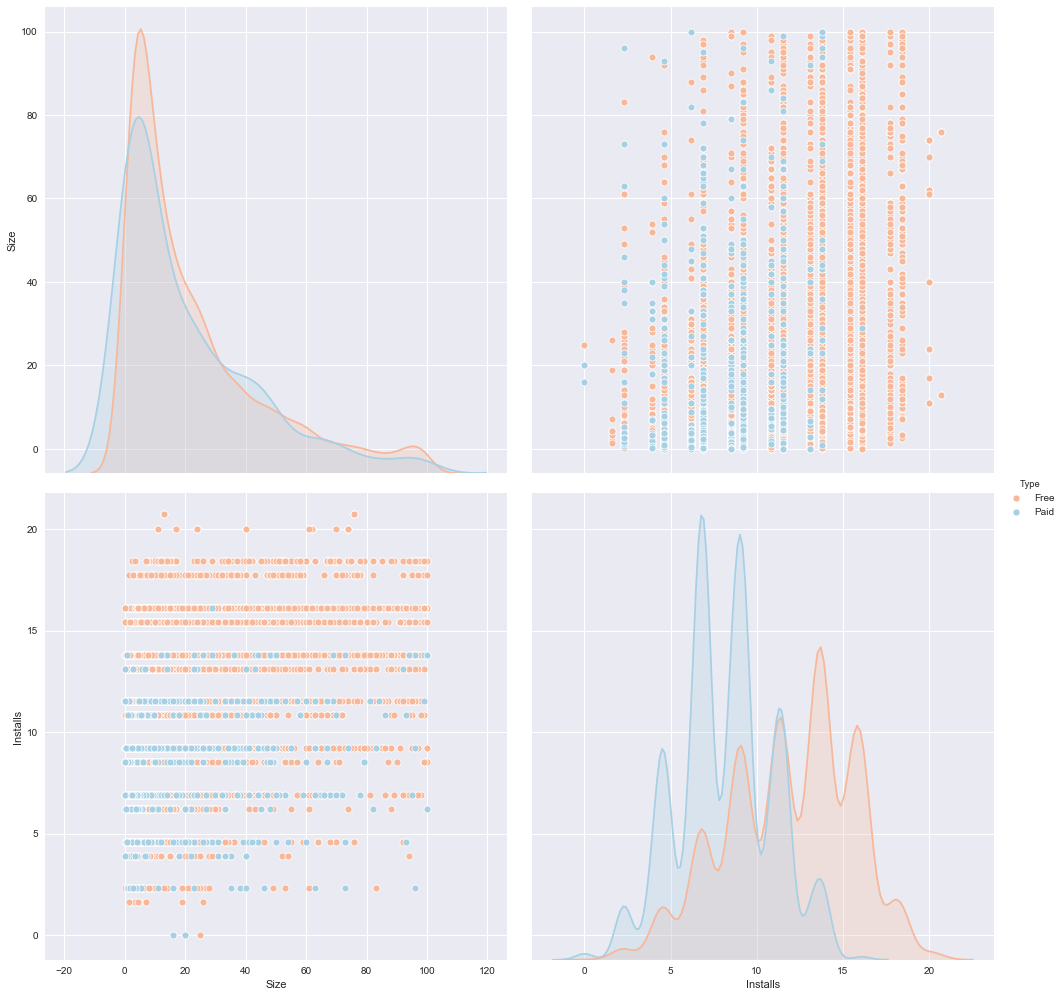

In [42]:
p = sns.pairplot(pd.DataFrame(list(zip(y, np.log(z),t)), 
                        columns=['Size','Installs','Type']), 
                 hue='Type', palette="RdBu",height=7)

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


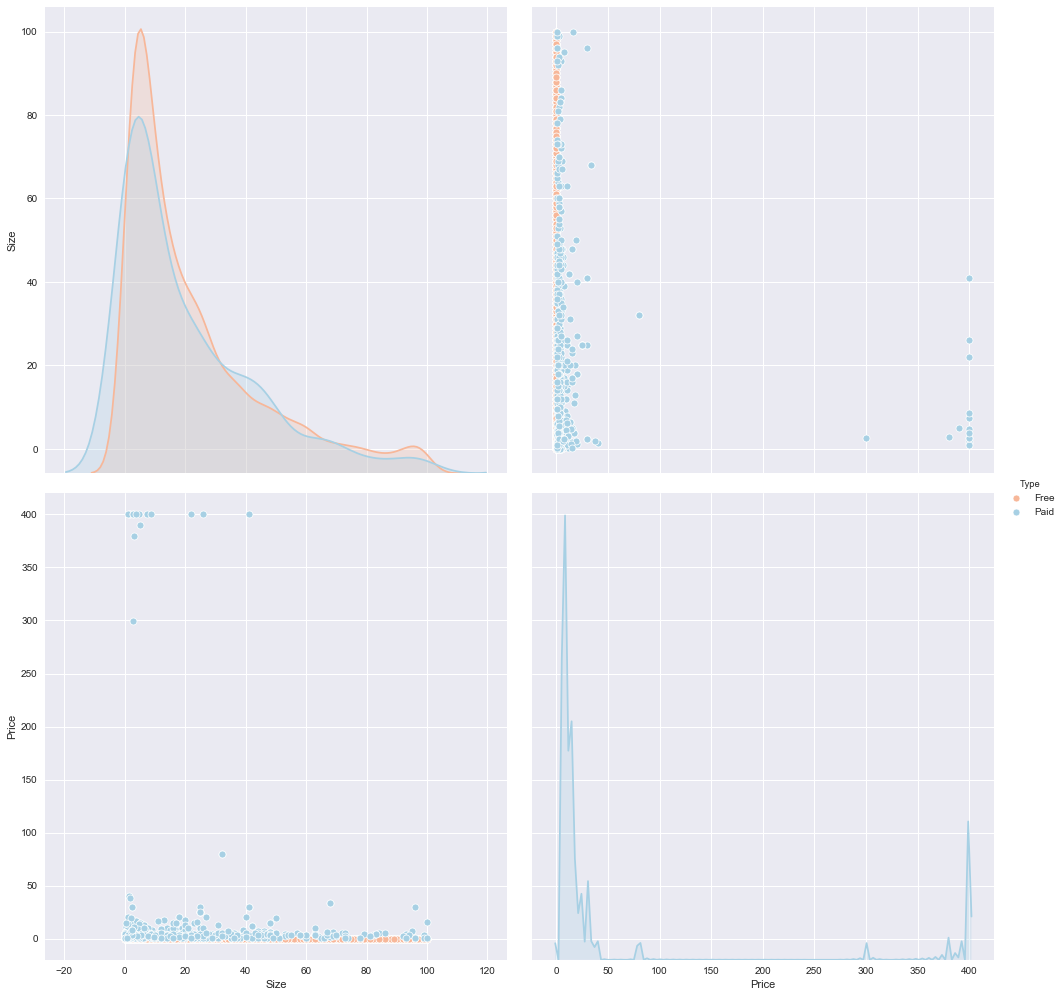

In [43]:
p = sns.pairplot(pd.DataFrame(list(zip(y, price,t)), 
                        columns=['Size','Price','Type']), 
                 hue='Type', palette="RdBu",height=7)

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


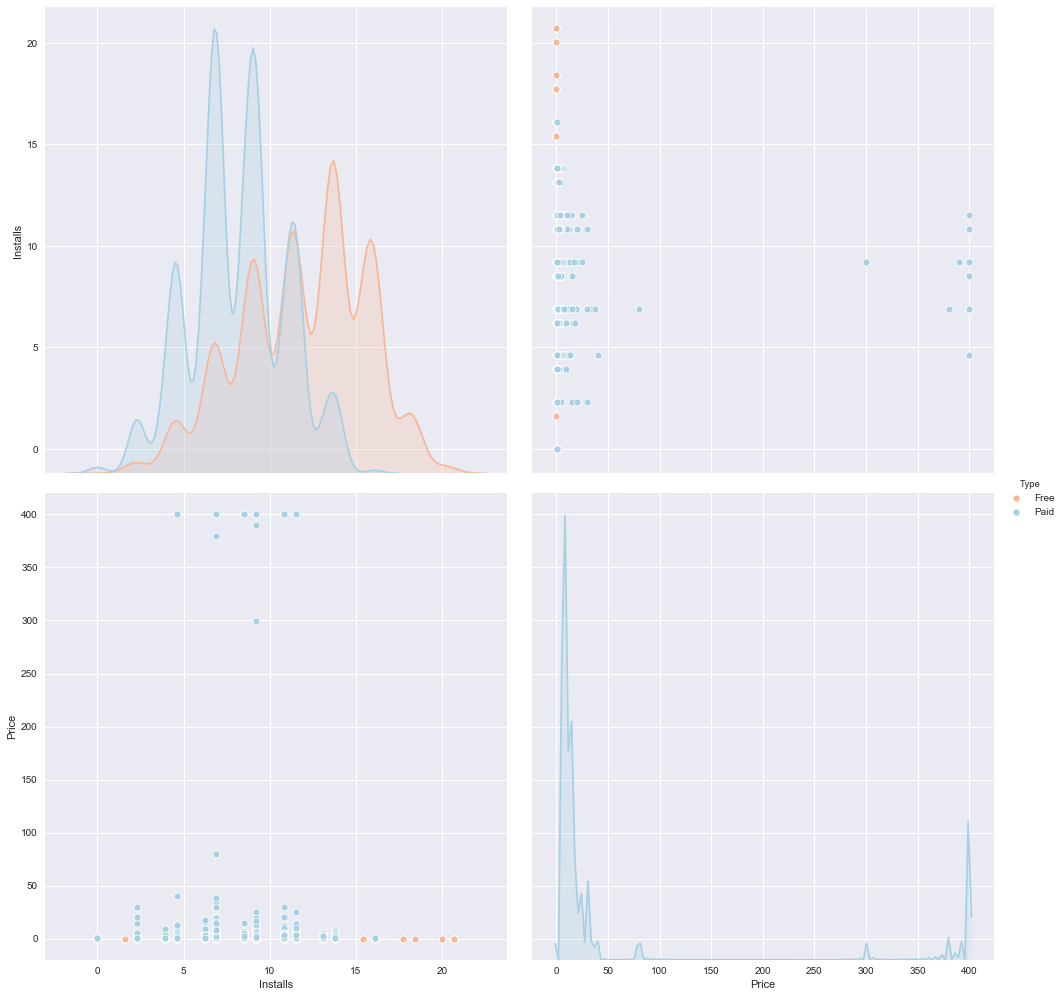

In [44]:
p = sns.pairplot(pd.DataFrame(list(zip(np.log(z), price,t)), 
                        columns=['Installs','Price','Type']), 
                 hue='Type', palette="RdBu",height=7)

#### 2. Market share of apps

- Since we only want to see categories that really matters, we don't really need categories that count for less than 1% market, so we combine all categories that less than 1% and form a "OTHER" group to hold them

In [ ]:
appNum_by_categorys = df['Category'].value_counts().sort_values(ascending = False)
app_under_1percent = appNum_by_categorys[-10:]
appNum_by_categorys = appNum_by_categorys[:-10]
appNum_by_categorys.loc['OTHER'] = sum(x for x in app_under_1percent )
appNum_by_categorys

In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
import colorlover as cl
from IPython.display import HTML

rdbu = cl.scales['11']['div']['RdBu']
bupu = cl.scales['9']['seq']['Oranges']
blues = cl.scales['9']['seq']['Blues']

plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
    "data": [go.Pie(
        labels = appNum_by_categorys.index,
        values = appNum_by_categorys.values,
        hoverinfo = 'label+value',
        marker=dict(colors = blues + bupu + rdbu)
)],
    "layout": go.Layout(title="Market Share of apps by Category")
})

#### 3.Relation between category and ratings

In [35]:
## Initialize dateframe of category vs rating
category = list(df.Category.unique())
average_ratings = []
for item in category:
    i = df[df.Category == item]
    avg_rating = i.Rating.sum()/len(i)
    average_ratings.append(avg_rating)
cate_rate = pd.DataFrame({'Category':category,'Average Rating':average_ratings})

In [36]:
## Sort dateframe by rating
cate_rate = cate_rate.sort_values(by = ['Average Rating'], ascending = False)

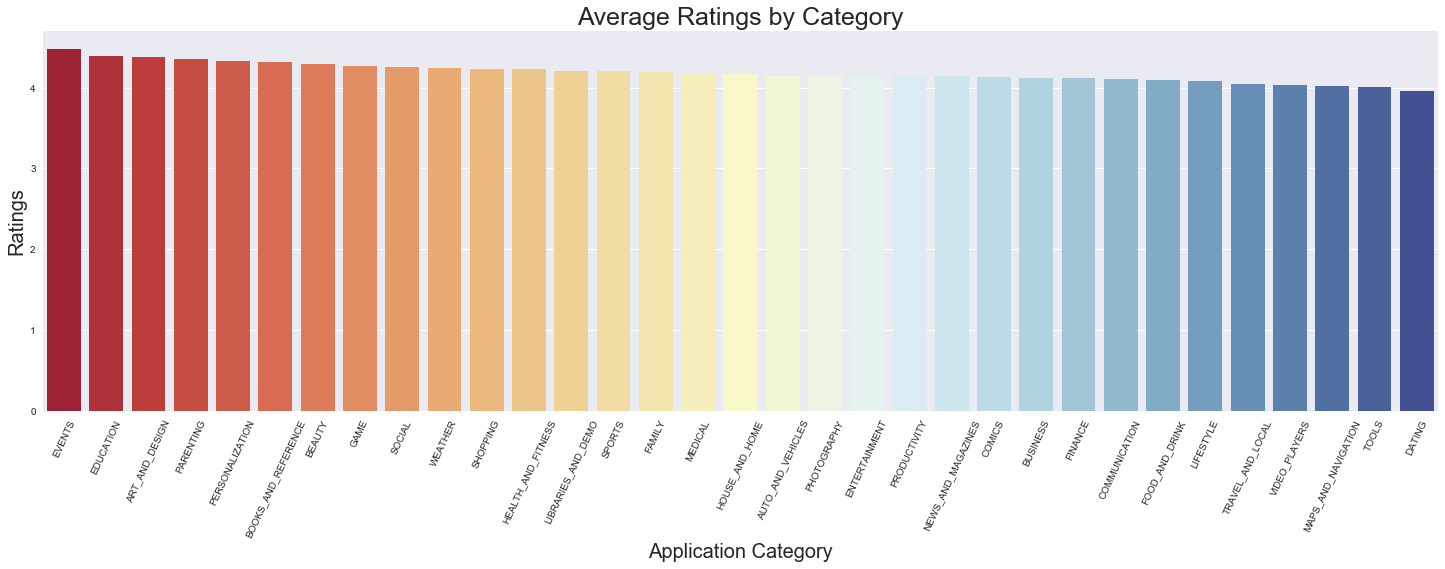

In [37]:
plt.figure(figsize=(25,7))
sns.barplot(x=cate_rate.Category, y=cate_rate['Average Rating'], palette="RdYlBu")

plt.xticks(rotation = 65)
plt.xlabel('Application Category', fontsize=20)
plt.ylabel('Ratings',fontsize=20)
plt.title('Average Ratings by Category',fontsize=25)
plt.show()

#### 4. Relation between Installs, Category and Ratings

In [ ]:
#split rating into 5 intervals
df['Rating Interval'] = np.where(df['Rating'] <= 2, '1-2',
                                 (np.where(df['Rating'] <= 3, '2-3', 
                                           (np.where(df['Rating'] <= 4, '3-4', '4-5')))))

In [ ]:
import seaborn as sns
from matplotlib import pyplot
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

x = df['Category']
y = df['Installs']
t = df['Rating Interval']
# cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
q = sns.scatterplot(x="Category", y="Installs",
                      hue=t , size=t,palette = 'Blues_d', 
                      legend="full", data=df, ax = ax)

#### RATING GENERE   

## Basic sentiment analysis of user reviews

In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob 

df_sent=pd.read_csv('googleplaystore_user_reviews_1.csv')

In [ ]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else: 
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()


<li> Transfer reviews into list

In [ ]:
app_review = np.array(df_sent['Translated_Review'])
app_review = app_review.tolist()

<li> Use textblob to do sentiment analysis
 

In [ ]:
def get_sentiment_polarity(text):
    r= TextBlob(text).sentiment.polarity
    w = TextBlob(text).sentiment.subjectivity
    if r > 0:
        s = 'Positive'
    elif r == 0:
        s = 'Neutral'
    else:
        s = 'Negative'
    return (s,r,w)



In [ ]:
sentiment=[]
sentiment_polarity=[]
sentiment_subjectivity=[]
for i in app_review:
    if isinstance(i,str):
        e = get_sentiment_polarity(i)
        sentiment.append(e[0])
        sentiment_polarity.append(e[1])
        sentiment_subjectivity.append(e[2])
    else:
        sentiment.append(i)
        sentiment_polarity.append(i)
        sentiment_subjectivity.append(i)

<li>Add sentiment, sentiment_polarity and sentiment_subjectivity to df

In [ ]:
df_sent['Sentiment'] = pd.DataFrame(sentiment)
df_sent['Sentiment_polarity'] = pd.DataFrame(sentiment_polarity)
df_sent['Sentiment_subjectivity']= pd.DataFrame(sentiment_subjectivity)

In [ ]:
df_sent

### Draw sentiment graph

In [ ]:
import plotly
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})



In [ ]:
df_2 = pd.merge(df, df_sent, on = "App", how = "inner")
df_2 = df_2.dropna(subset=['Sentiment', 'Translated_Review'])
grouped_sentiment_count = df_2.groupby(['Category', 'Sentiment']).agg({'App': 'count'}).reset_index()
grouped_sentiment_sum = df_2.groupby(['Category']).agg({'Sentiment': 'count'}).reset_index()
new_df = pd.merge(grouped_sentiment_count, grouped_sentiment_sum, on=["Category"])

new_df['Sentiment_Normalized'] = new_df.App/new_df.Sentiment_y
new_df = new_df.groupby('Category').filter(lambda x: len(x) ==3)

trace1 = go.Bar(
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[::3],
    name='Negative',
    marker=dict(color = 'rgb(158,202,225)')
)

trace2 = go.Bar(
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[1::3],
    name='Neutral',
    marker=dict(color = 'rgb(49,130,189)')
)

trace3 = go.Bar(
    x=list(new_df.Category[::3]),
    y= new_df.Sentiment_Normalized[2::3],
    name='Positive',
    marker=dict(color = 'rgb(8,48,107)')
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    title = 'Sentiment analysis',
    barmode='stack',
    xaxis = {'tickangle': -45},
    yaxis = {'title': 'Fraction of reviews'}
)

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot({'data': data, 'layout': layout})

<b> CONCLUSION</b>
<li> According to the graph above, <b>Comics </b> apps perform the best, having about 90% positive review.
<li> On the other hand, <b>Game</b> apps perform most terrible, with about 50% positive and 50% negative and neutral.

In [ ]:
sns.set_style('ticks',{"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12.3, 9.57)
ax = sns.boxplot(x='Type', y='Sentiment_polarity', data=df_2,palette='YlOrBr')
title = ax.set_title('Sentiment Polarity Distribution')

<b> CONCLUSION</b>
<li> Free apps received much more extreme comments which are indicated as the outliers on the negative Y-axis.
<li> Paid apps received more tolerant and moderate reviews - people will not give extreme comments to the paid apps.

In [ ]:
sns.set_style('ticks',{"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(12.3, 9.57)
ax = sns.boxplot(x='Type', y='Sentiment_subjectivity', data=df_2, palette='YlOrBr_r')
title = ax.set_title('Sentiment Subjectivity Distribution')

<b> CONCLUSION</b>
<li> Reviews of both free apps and paid apps are almost fairly subjective; 
<li> Paid apps are a little more subjective.

### Generate wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS

from nltk.corpus import stopwords
stop = STOPWORDS

wc = WordCloud(background_color="white", max_words=2000, stopwords=stop, colormap="Set2")

df_2.Translated_Review = df_2.Translated_Review.apply(lambda x: x if 'app' not in x.split(' ') else np.nan)
df_2.dropna(subset=['Translated_Review'], inplace=True)


<li><b>The wordcloud of free apps

In [ ]:
free = df_2.loc[df_2.Type=='Free']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(free)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<b> CONCLUSION OF FREE APPS</b>
<li> Positive words: love, good, great
<li> Negative words: ads, hate, bad

<li><b>The workdcloud of paid apps

In [ ]:
paid = df_2.loc[df_2.Type=='Paid']['Translated_Review'].apply(lambda x: '' if x=='nan' else x)
wc.generate(''.join(str(paid)))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

<b> CONCLUSION OF PAID APPS</b>
<li> Positive words: great, love, good
<li> Negative words: problem, malware

## Topic analysis

### Import for topic analysis

In [ ]:
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint
from wordcloud import STOPWORDS
import nltk
from nltk.corpus import PlaintextCorpusReader
from nltk import sent_tokenize,word_tokenize 
import gensim.summarization
import matplotlib.pyplot as plt
import seaborn as sns
import gc

### Delete the rows having NaN and build topic_graph function

In [ ]:
df_new = df_sent.dropna(axis=0, how='any')
df_new.reset_index(inplace =True)

In [ ]:
def topic_graph(df):
    reviews_list = []
    for i in range(len(df)):
        r = df['Translated_Review'][i]
        reviews_list.append(r)
    for i in range(len(reviews_list)):
        review = reviews_list[i]
        sents = sent_tokenize(review)
    for j in range(len(sents)):
        sent = sents[j]
        sent = sent.strip().replace('\n','')
        sents[j] = sent
    reviews_list[i] = '. '.join(sents)
    
    texts = [[word for word in review.lower().split()
        if word not in STOPWORDS and word.isalnum() and not word.lower() == 'slate']  #remove numbers and not words
        for review in reviews_list]
    dictionary = corpora.Dictionary(texts) #(word_id,frequency) pairs
    corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence
    num_topics = 1 #The number of topics that should be generated
    passes = 10
    lda = LdaModel(corpus,
                  id2word=dictionary,
                  num_topics=num_topics,
                  passes=passes)

    tp = lda.top_topics(corpus,topn=5,dictionary=dictionary)
    return tp

#### Graphing the top apps from the top 5 categories.

<li> Choose the best performing apps in the top 5 best performing categories.

In [ ]:
category_list = ['EDUCATION', 'ART_AND_DESIGN', 'ENTERTAINMENT','GAME','COMICS']

app_list=[]
for i in category_list:
    x = df_2[df_2['Category']==i].sort_values(by = ['Rating'], ascending = False)
    r = np.array(x[0:1]).tolist()
    app_list.append((i,r[0][0]))



In [ ]:
df_edu = df_new[df_new['App']=='Duolingo: Learn Languages Free']
df_edu.reset_index(inplace =True)
df_art = df_new[df_new['App']=='Colorfit - Drawing & Coloring']
df_art.reset_index(inplace =True)
df_enter=df_new[df_new['App']=='Fandango Movies - Times + Tickets']
df_enter.reset_index(inplace =True)
df_game=df_new[df_new['App']=='Bowmasters']
df_game.reset_index(inplace =True)
df_comics = df_new[df_new['App']=='Best Wallpapers Backgrounds(100,000+ 4K HD)']
df_comics.reset_index(inplace =True)
df_list = []
df_list.append(df_edu)
df_list.append(df_art)
df_list.append(df_enter)
df_list.append(df_game)
df_list.append(df_comics)

In [ ]:
results = []
for w in df_list:
    result = topic_graph(w)
    results.append(result)

In [ ]:
f,ax = plt.subplots(5,1,figsize = (5,20))

for i in range(5):
# sns.barplot(label,value,palette='RdBu_r', ax=ax1)
    ax[i].set_title(app_list[i-1])
    label = [] 
    value = []
    for j,k in results[i][0][0]:
        label.append(j)
        value.append(k)
    sns.barplot(label,value, ax= ax[i], palette='YlOrBr_r');